In [2]:
import os
import pandas as pd
from arch import arch_model

# Load the data
current_dir = os.getcwd()
pickle_path = os.path.join(current_dir, 'data')
average_iv_series = pd.read_pickle(os.path.join(pickle_path, 'average_iv_series_with_date_nasdaq100.pkl'))

# Rescale the entire series by 100
average_iv_series = 100 * average_iv_series


In [3]:
# Set the rolling window size and forecast horizon
rolling_window_size = 252  # One year of daily data (assuming 252 trading days in a year)
forecast_horizon = 1  # Assuming a forecast horizon of 1 day
rolling_forecasts = []

# Perform rolling window forecasting
for start in range(len(average_iv_series) - rolling_window_size):
    end = start + rolling_window_size
    window_data = average_iv_series[start:end]
    model = arch_model(window_data, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp='off')
    forecast = garch_fit.forecast(horizon=forecast_horizon).variance.iloc[-1]
    rolling_forecasts.append(forecast)

# Convert rolling forecasts to a DataFrame
rolling_forecasts_df = pd.DataFrame(rolling_forecasts, index=average_iv_series.index[rolling_window_size:])


In [4]:
# Extract the last 100 days of actual values and forecasts
actual_values = average_iv_series.iloc[-100:]
forecast_values = rolling_forecasts_df.iloc[-100:]

# Create a DataFrame to compare the actual values and forecasts
comparison_df = pd.DataFrame({
    'Actual': actual_values.values.flatten(),
    'Forecast': forecast_values.values.flatten()
}, index=actual_values.index)

# Display the comparison DataFrame
print(comparison_df)


         Actual   Forecast
1158  22.106447  26.243973
1159  22.015671  28.465129
1160  20.793171  28.971210
1161  21.695148  40.926186
1162  23.139496  31.643316
...         ...        ...
1253  23.741440   2.573482
1254  24.438179   1.638804
1255  23.899919   1.466096
1256  23.748447   1.268441
1257  24.170314   1.215941

[100 rows x 2 columns]


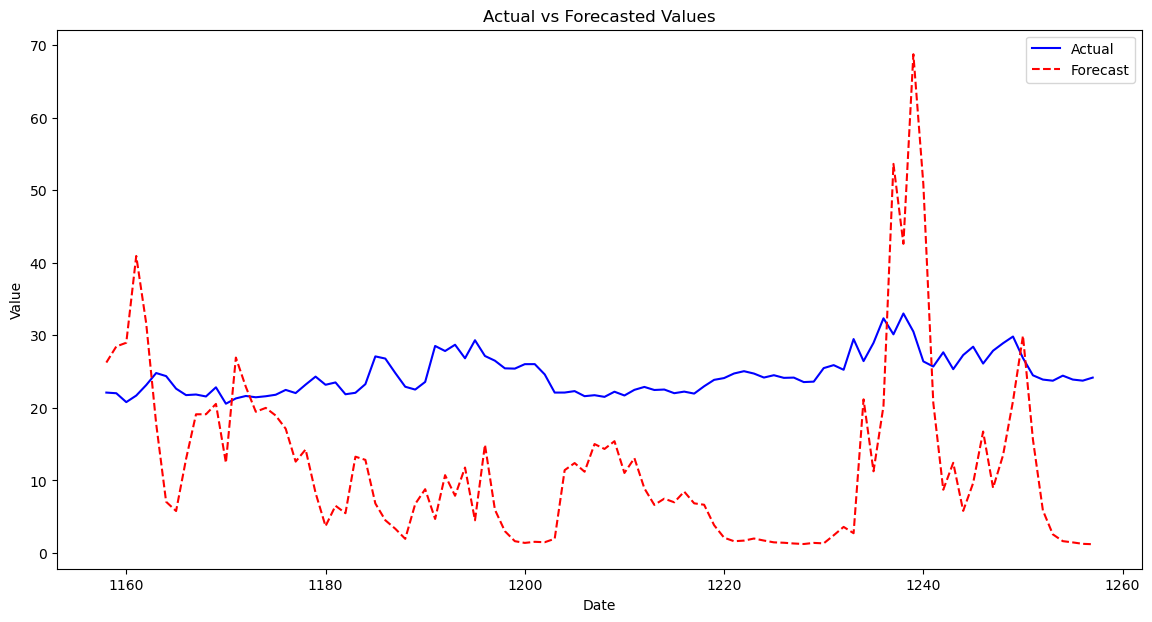

In [8]:
# Plot the actual values and forecasts
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df.index, comparison_df['Forecast'], label='Forecast', color='red', linestyle='--')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

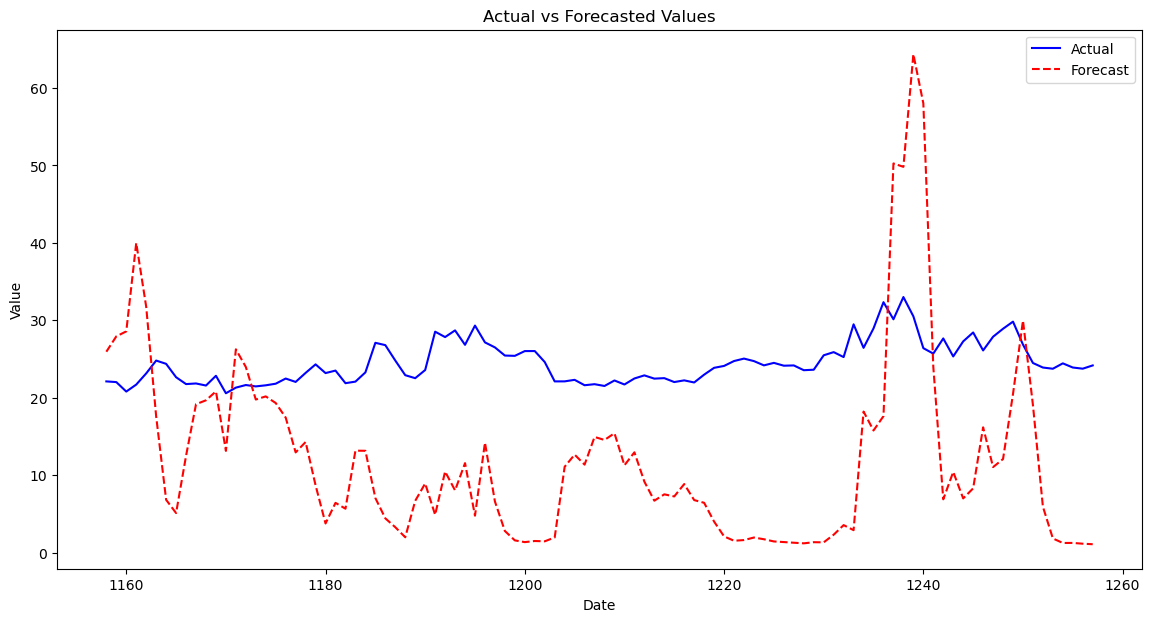

In [9]:
import os
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Load the data
current_dir = os.getcwd()
pickle_path = os.path.join(current_dir, 'data')
average_iv_series = pd.read_pickle(os.path.join(pickle_path, 'average_iv_series_with_date_nasdaq100.pkl'))

# Rescale the entire series by 100
average_iv_series = 100 * average_iv_series

# Set the rolling window size and forecast horizon
rolling_window_size = 252  # One year of daily data (assuming 252 trading days in a year)
forecast_horizon = 1  # Assuming a forecast horizon of 1 day
rolling_forecasts = []

# Perform rolling window forecasting
for start in range(len(average_iv_series) - rolling_window_size):
    end = start + rolling_window_size
    window_data = average_iv_series[start:end]
    model = arch_model(window_data, vol='Garch', p=2, q=2)
    garch_fit = model.fit(disp='off')
    forecast = garch_fit.forecast(horizon=forecast_horizon).variance.iloc[-1]
    rolling_forecasts.append(forecast)

# Convert rolling forecasts to a DataFrame
rolling_forecasts_df = pd.DataFrame(rolling_forecasts, index=average_iv_series.index[rolling_window_size:])

# Extract the last 100 days of actual values and forecasts
actual_values = average_iv_series.iloc[-100:]
forecast_values = rolling_forecasts_df.iloc[-100:]

# Create a DataFrame to compare the actual values and forecasts
comparison_df = pd.DataFrame({
    'Actual': actual_values.values.flatten(),
    'Forecast': forecast_values.values.flatten()
}, index=actual_values.index)

# Plot the actual values and forecasts
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df.index, comparison_df['Forecast'], label='Forecast', color='red', linestyle='--')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
